<a href="https://colab.research.google.com/github/pahtech/Product_Sales_Prediction/blob/main/Product_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Product Sales Prediction
*Created by: Phuong Huynh*

We will predict the number of food items sold at various stores by understanding how different properities/features of products and outlet stores play a crucial role in items sold.

#A - Load and Inspect Data


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data


1) How many rows and columns?


In [136]:
print('Row count: ', len(df.index))
print('Column count: ', len(df.columns))

Row count:  8523
Column count:  12


2) What are the datatypes of each variable?

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.

In [138]:
dup_rows = df.duplicated(keep=False)
sum_dup = dup_rows.sum()
sum_dup

#There are no duplicates

0

In [139]:
df.drop_duplicates(inplace=True, keep='first')
df.duplicated().sum()

0

4) Identify missing values.

In [140]:
missing = df.isna().sum()
missing / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

5) Address the missing values by using a placeholder value.

In [141]:
outlet_size_na_rows = df['Outlet_Size'].isna()
df.loc[outlet_size_na_rows, 'Outlet_Size'] = 'Medium'


In [142]:
item_weight_filter = df['Item_Weight'].isna()
df.loc[item_weight_filter, 'Item_Weight'] = 100.0

6) Confirm that there are no missing values after addressing them.

In [143]:
missing = df.isna().sum()
missing / len(df) * 100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [145]:
cols = df.select_dtypes(include=['object']).columns
df[cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [146]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [147]:
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [148]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [149]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [150]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [151]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [152]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [153]:
cols = df.select_dtypes(include=['int', 'float']).columns
cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [154]:
for col in cols:
  print(f"{col}: ")
  print("Min: ", df[col].min())
  print("Max: ", df[col].max())
  print("Mean: ", df[col].mean())
  print("\n")

Item_Weight: 
Min:  4.555
Max:  100.0
Mean:  27.81590695764402


Item_Visibility: 
Min:  0.0
Max:  0.328390948
Mean:  0.06613202877895108


Item_MRP: 
Min:  31.29
Max:  266.8884
Mean:  140.9927819781767


Outlet_Establishment_Year: 
Min:  1985
Max:  2009
Mean:  1997.8318667135984


Item_Outlet_Sales: 
Min:  33.29
Max:  13086.9648
Mean:  2181.288913575032




#B - Visualizations to help understand the data

Exploratory visuals are created to help understand, explain, and model the data. Visuals include:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

## Exploratory Data Analysis


In [155]:
pd.set_option('display.max_columns', 100)

# Histograms
To view distributions of numerical features in the data

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


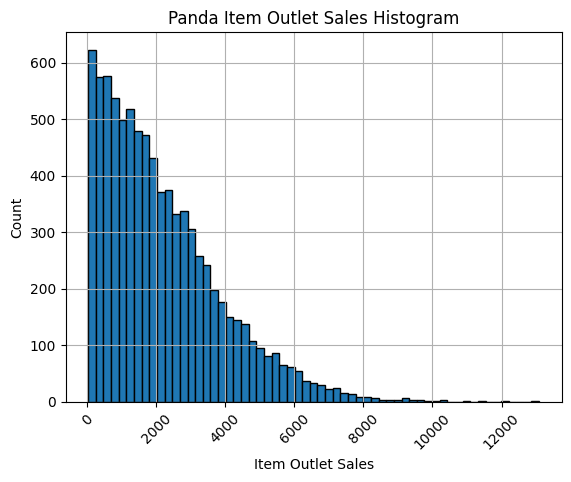

In [157]:
ax = df['Item_Outlet_Sales'].hist(bins='auto', edgecolor='black');
ax.tick_params(axis='x', rotation=45);
ax.ticklabel_format(style='plain');
ax.set_title("Panda Item Outlet Sales Histogram");
ax.set_xlabel("Item Outlet Sales");
ax.set_ylabel("Count");

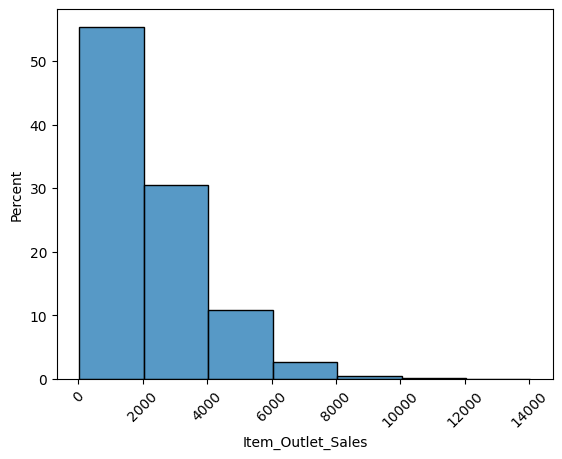

In [158]:
ax2 = sns.histplot(data=df, x='Item_Outlet_Sales', binwidth=2_000, stat='percent') # bin width (0-2000, 2000-4000, etc)
ax2.ticklabel_format(style='plain')
ax2.tick_params(axis='x', rotation = 45)

# Boxplots
To view statistical summaries of numerical features in your dataset.

Text(0.5, 1.0, 'Comparing Item Weight and Item Fat Content')

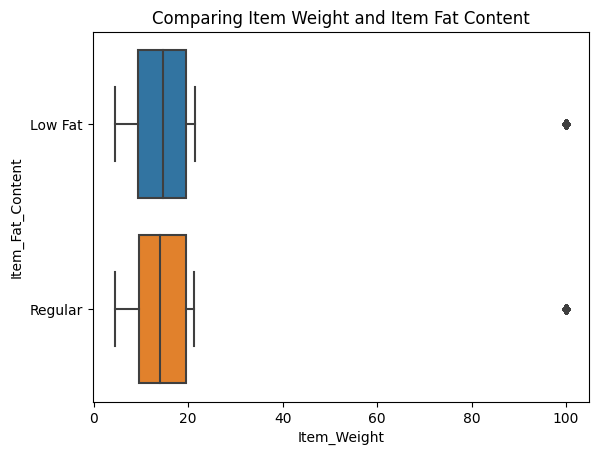

In [159]:
ax = sns.boxplot(data=df, x='Item_Weight', y='Item_Fat_Content')
ax.set_title('Comparing Item Weight and Item Fat Content')

# Countplots
To view the frequency of each class of categorial features in your dataset.

In [160]:
#df.info()
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [161]:
df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

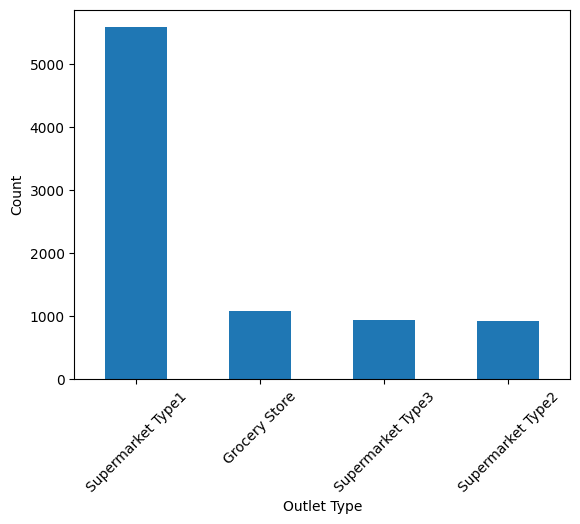

In [162]:
val_counts = df['Outlet_Type'].value_counts()
val_counts

ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Outlet Type");
ax.tick_params(axis='x', rotation = 45)


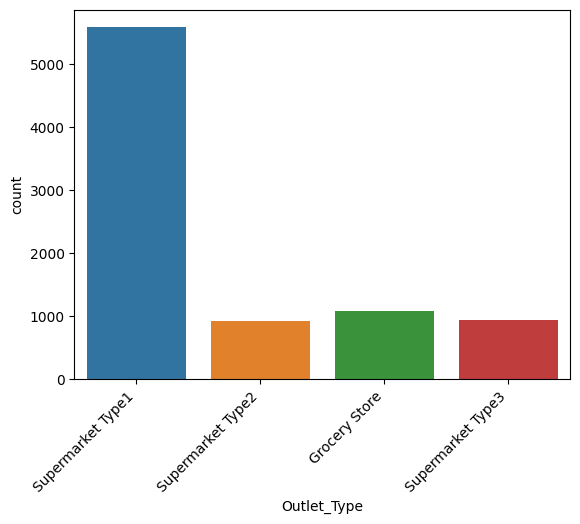

In [163]:
ax = sns.countplot(data=df, x="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

# Heatmap
To view the correlation between features

In [164]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,0.09,-0.01,-0.69,0.08
Item_Visibility,0.09,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.01,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.69,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.08,-0.13,0.57,-0.05,1.00


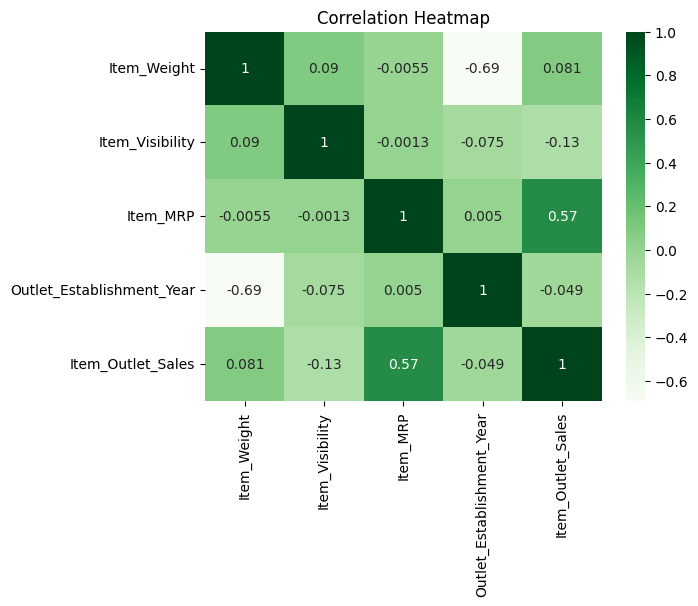

In [165]:
fig, ax = plt.subplots();
ax.set_title("Correlation Heatmap");
ax.set_xlabel('Features')
sns.heatmap(corr, cmap='Greens', annot = True);

#C - Processing the Data with Machine Learning

In [166]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
fpath= '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Basic EDA (Exploratory Data Analysis)

## Categorical Columns

In [168]:
# Check data types and convert if needed

#Check categorical data
df.select_dtypes('object').head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [169]:
# Check for duplicated rows
df.duplicated().sum()

0

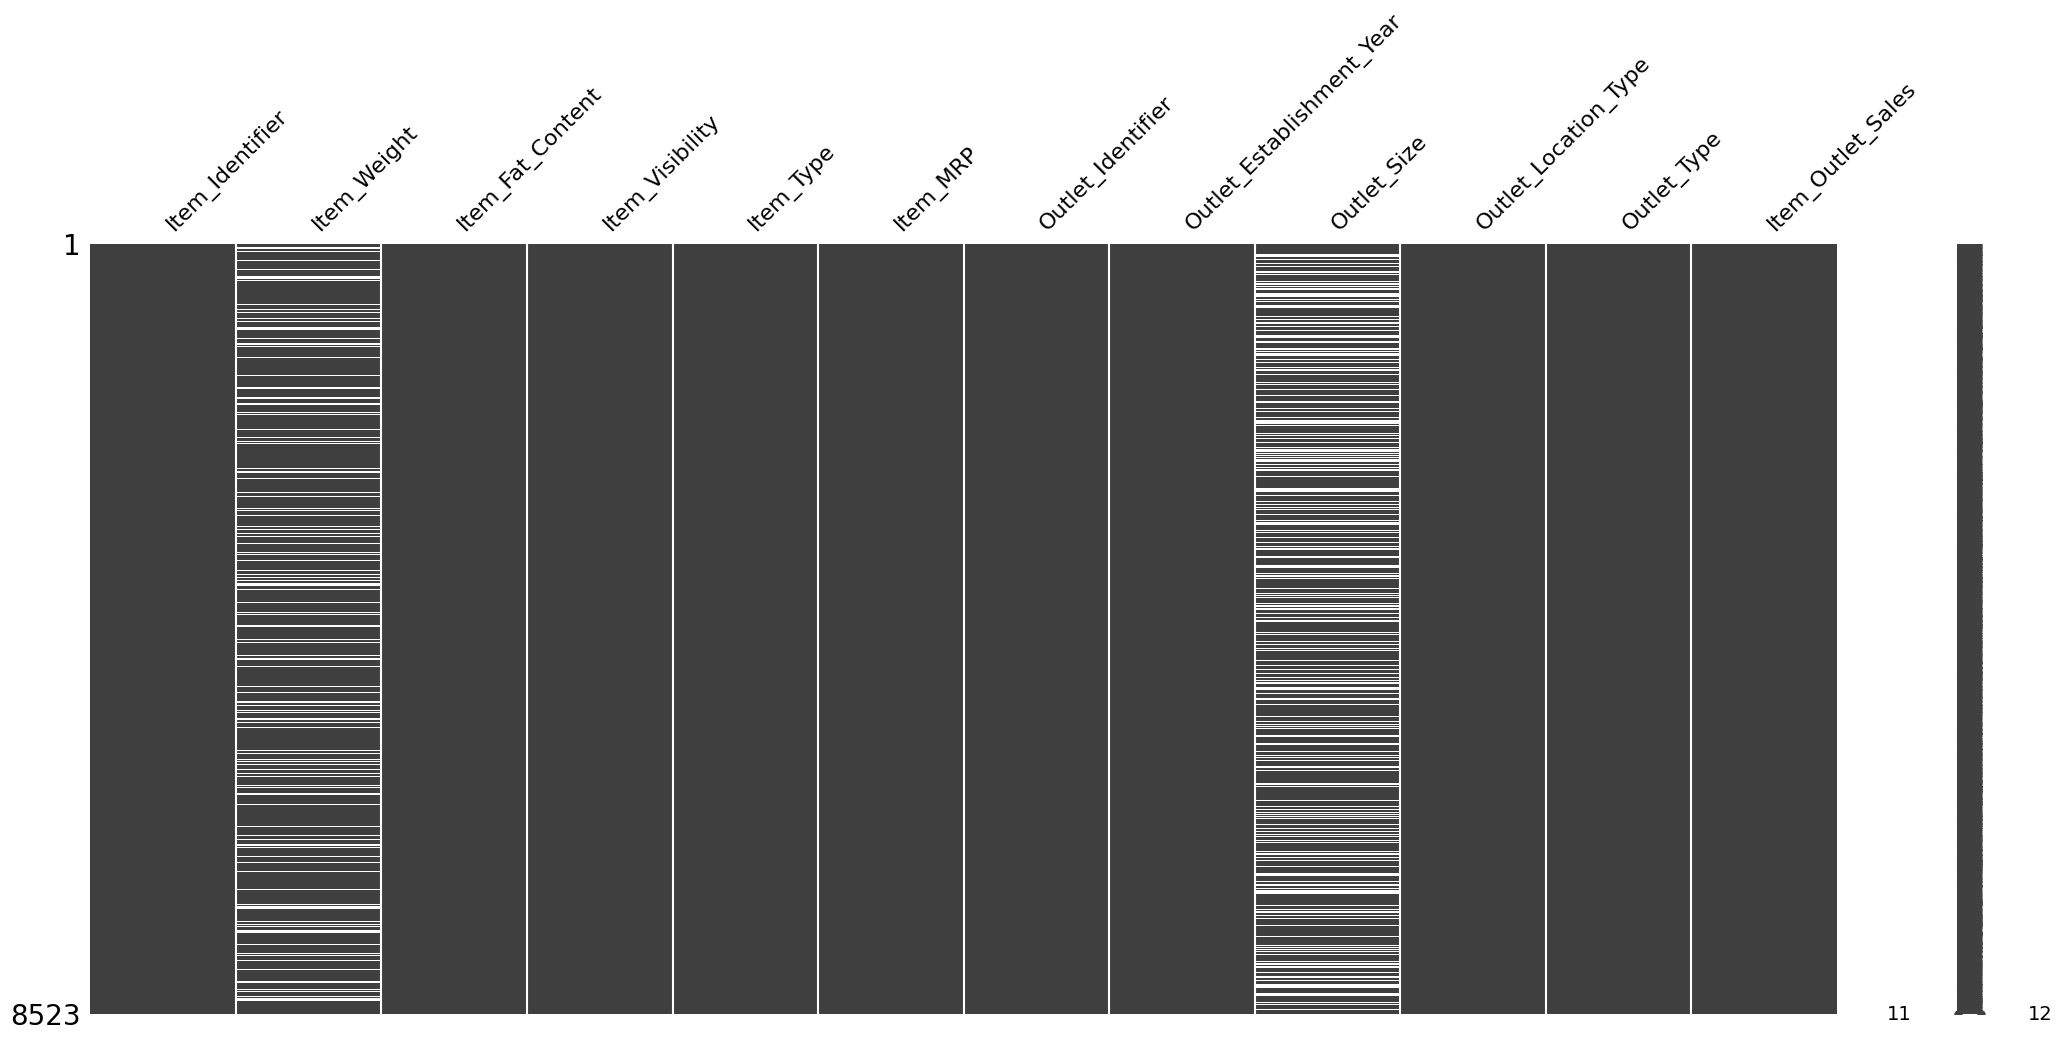

In [170]:
# Check for null values
import missingno as msno
msno.matrix(df);

In [171]:
# get # of null values per column
null_sums = df.isna().sum()
null_sums[null_sums>0]
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [172]:
# Calculate the % of null values
null_percent = null_sums/len(df) * 100
# Show only columns with missing values
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

In [173]:
# Check for inconsistent categorical values
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [174]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"{col}:")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010  

In [175]:
# Standarize the values in the central column
df['Outlet_Type'].value_counts()
df['Outlet_Type'] = df['Outlet_Type'].replace({'Grocery Store':"Supermarket Type0"})
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Supermarket Type0    1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [176]:
# Check for naming issues
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [177]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat", 'reg':"Regular", 'low fat':"Low Fat"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Numerical Columns

In [178]:
# Getting the description for numeric features
description = df.describe()
description

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [179]:
# Limit output to min, max, 25% and 75%
description.loc[['min','25%','75%','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.55500,0.000000,31.2900,1985.0,33.2900
25%,8.77375,0.026989,93.8265,1987.0,834.2474
75%,16.85000,0.094585,185.6437,2004.0,3101.2964
max,21.35000,0.328391,266.8884,2009.0,13086.9648


In [180]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [181]:
x = df['Item_Outlet_Sales'] > 0

In [182]:
# Check highest prices
df.sort_values("Item_Outlet_Sales", ascending=False).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840


## Additional Imports for ML

In [183]:
# Import packages
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

## Define Features and Target, Split the Data

In [184]:
# Define features (X) and target (y).

target = 'Item_Outlet_Sales'
X = df.drop(columns=[target, 'Item_Identifier'])
y = df[target]
X.columns


Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [185]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [186]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


In [187]:
X_train.shape

(6392, 10)

In [188]:
# Checking object columns
obj_cols = X_train.select_dtypes('object').columns

In [189]:
for col in obj_cols:
  print("****", col)
  print(X_train[col].value_counts(dropna=False))
  print(".....\n")

**** Item_Fat_Content
Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64
.....

**** Item_Type
Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64
.....

**** Outlet_Identifier
OUT027    723
OUT035    709
OUT018    704
OUT045    699
OUT017    698
OUT046    695
OUT013    689
OUT049    676
OUT010    415
OUT019    384
Name: Outlet_Identifier, dtype: int64
.....

**** Outlet_Size
Medium    2103
NaN       1812
Small     1788
High       689
Name: Outlet_Size, dtype: int64
.....

**** Outlet_Location_Type
Tier 3    2531
Tier 2    2106
Tier 1

In [190]:
X_train.select_dtypes('number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

# Create Pipeline for Processing Data

### Ordinal Pipeline

In [191]:
# If we had ordinal features
# Prepare ordinal pipeline
ord_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# List ordinal orders
outlet_size_order = ['Small', 'Medium', 'High'] # also has nan
location_type_order = ['Tier 1', 'Tier 2', 'Tier 3']
outlet_type_order = ['Supermarket Type0', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

# combine the orders in a list
ord_cols_order = [outlet_size_order, location_type_order, outlet_type_order]

# Impute Most common
impute_common = SimpleImputer(strategy='most_frequent')

# Ordinal Encoder
ord_encoder = OrdinalEncoder(categories = ord_cols_order)

# Scaler
scaler = StandardScaler()

# make a pipeline
#pipeline includes make_pipeline(missing values imputer, order encoder, and scaler)
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3'],
                                            ['Supermarket Type0',
                                             'Supermarket Type1',
                                             'Supermarket Type2',
                                             'Supermarket Type3']])),
                ('standardscaler', StandardScaler())])

In [192]:
# Ordinal tuple
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3'],
                                             ['Supermarket Type0',
                                              'Supermarket Type1',
                                              'Supermarket Type2',
                                              'Supermarket Type3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [193]:
X_train['Outlet_Size'].value_counts(dropna=False)

Medium    2103
NaN       1812
Small     1788
High       689
Name: Outlet_Size, dtype: int64

### Categorical Pipeline

In [194]:
# If we had categorical features

# Prepare Categorical pipeline
#ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

impute_na = SimpleImputer(strategy='constant', fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe



Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [195]:
# Categorical tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier'], dtype='object'))

In [196]:
ohe_pipe.fit(X_train[ohe_cols])

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [197]:
ohe_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier'], dtype='object')

In [198]:
df['Item_Fat_Content'].unique

<bound method Series.unique of 0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object>

In [199]:
X_train_ohe_tf = ohe_pipe.transform(X_train[ohe_cols])
X_test_ohe_tf = ohe_pipe.transform(X_test[ohe_cols])
X_train_ohe_tf.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
4776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5327,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Numerical Pipeline

In [200]:
# Prepare numeric piepline
#unwanted_cols = ['sodium', 'carbo', 'potass', 'vitamins', 'weight', 'cups']
##num_cols = ['calories', 'protein', 'fat', 'fiber', 'sugars']
#num_cols = X_train.select_dtypes('number').drop(columns=unwanted_cols).columns

num_cols = X_train.select_dtypes('number').columns
mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [201]:
# Numeric tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [202]:
num_pipe.fit(X_train[num_cols])
X_train_num_tf = num_pipe.transform(X_train[num_cols])
X_test_num_tf = num_pipe.transform(X_test[num_cols])
X_train_num_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4776,0.817249,-0.712775,1.828109,1.327849
7510,0.556340,-1.291052,0.603369,1.327849
5828,-0.131512,1.813319,0.244541,0.136187
5327,-1.169219,-1.004931,-0.952591,0.732018
4810,1.528819,-0.965484,-0.336460,0.493686


## Column Transformer

In [203]:
preprocessor = ColumnTransformer([num_tuple, ohe_tuple, ord_tuple],
                                     verbose_feature_names_out=False, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant'))...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Supermarket '
                                                                              'Type0',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Outlet_Type'])],
                  verbose_feature_names_out=False)

In [204]:
# Testing the column transformer (Optional)
preprocessor.fit_transform(X_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287374,1.084948,0.983572
7510,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287374,1.084948,0.983572
5828,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.287374,-1.384777,-0.263600
5327,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.384048,-0.149914,-0.263600
4810,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374,-0.149914,-0.263600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.832409,4.309657,-0.044657,0.017021,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287374,1.084948,-1.510771
5191,0.639356,1.008625,-1.058907,1.089517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287374,-0.149914,-0.263600
5390,1.113736,-0.920527,1.523027,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374,-0.149914,-0.263600
860,1.766009,-0.227755,-0.383777,1.089517,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287374,-0.149914,-0.263600


#D - Modeling

## Helper Functions for Evaluating Metrics

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



### Linear Regression Model

In [206]:
#Instantiate linear regression model
linreg = LinearRegression()

#Make a pipeline to combine our preprocessing and model
linreg_pipe = make_pipeline(preprocessor, linreg)

# Fit the model pipeline onto training data only
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type0',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

## Regression Models

### Linear Regression (Default)

In [207]:
#Instantiate linear regression model
linreg = LinearRegression()

#Make a pipeline to combine our preprocessing and model
linreg_pipe = make_pipeline(preprocessor, linreg)

# Fit the model pipeline onto training data only
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(...
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type0',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [208]:
linreg_eval = evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test, verbose= False, output_frame=True)

linreg_eval

,MAE,MSE,RMSE,R^2
Training Data,847.121,1297553.659,1139.102,0.562
Test Data,804.172,1194394.730,1092.884,0.567


### Random Forest (Default)

In [209]:
# Instantiate the DEFAULT random forest model (no hyperparameter adjustments)
rf = RandomForestRegressor(random_state = 42)

# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

# Fit the Pipeline on training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(...
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Supermarket '
                                                                                               'Type0',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [210]:
# Evaluate how well it can predict
default_rf_eval = evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test, verbose=False, output_frame=True)
default_rf_eval

,MAE,MSE,RMSE,R^2
Training Data,296.269,182998.451,427.783,0.938
Test Data,767.107,1218416.701,1103.819,0.558


### Linear Regression Default Vs. Random Forest Default Models

In [211]:
# Linear Regression
print("Linear Regression Model:")
linreg_eval

Linear Regression Model:


,MAE,MSE,RMSE,R^2
Training Data,847.121,1297553.659,1139.102,0.562
Test Data,804.172,1194394.730,1092.884,0.567


In [212]:
#Random Forest Model
print("Default Random Forest")
default_rf_eval

Default Random Forest


,MAE,MSE,RMSE,R^2
Training Data,296.269,182998.451,427.783,0.938
Test Data,767.107,1218416.701,1103.819,0.558


### Tuning the Random Forest Model

In [213]:
# Determine what are the available parameters we can tune
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant'))...
                                                     SimpleImputer(strategy='most_frequent')),
                       

In [214]:
# Define param grid with options to try (dictionary of parameters and their values we can try)
params = {'randomforestregressor__max_depth': [None,1, 2, 3, 4, 5,10,15,20],
          'randomforestregressor__n_estimators': np.arange(10, 201, 50),
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [215]:
# WARNING - THIS BLOCK TAKES A LONG TIME
# Instantiate GridSearchCV and train it on the pipeline
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv=3, verbose=1)

# Fit it! (Takes a long time)
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('s...
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 1, 2, 3, 4,
                                                              5, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': array([ 10,  60, 110, 160]),
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [216]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 110,
 'randomforestregressor__oob_score': True}

In [217]:
# Refit gridsearch to the best parameters it found
best_gs_rf = gridsearch.best_estimator_
# Evaluate how well the gridsearch did
gs_rf_eval = evaluate_regression(best_gs_rf, X_train, y_train, X_test, y_test, verbose=False, output_frame=True)
gs_rf_eval

,MAE,MSE,RMSE,R^2
Training Data,755.434,1152856.857,1073.712,0.610
Test Data,728.547,1096604.688,1047.189,0.603


### Saving Data with Joblib

In [218]:
# SAVING GRIDSEARCH results and other data as a joblib file
preprocessor = preprocessor
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train': y_train,
         'X_test':X_test,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'GridSearch':gridsearch}

# saving the export dict as a joblib file--saving to new Models/Autompg folder
os.makedirs('/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Models', exist_ok=True)
# check that the folder has been created
os.listdir('/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Models')
# save dictionary as a joblib file
joblib.dump(export, '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Models/Project1Part6_RandomForest_GridSearch.joblib')

['/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Models/Project1Part6_RandomForest_GridSearch.joblib']

In [219]:
# LOAD THIS TO REUSE DATA FROM GRIDSEARCH AND OTHER DATA
loaded = joblib.load('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Models/EnsembleTrees/bagged_tree_gridsearch.joblib')
loaded.keys()

# Loading data and objects in a new notebook
X_train = loaded['X_train']
y_train = loaded['y_train']
X_test = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
gridsearch = loaded['GridSearch']

### Compare: Default Linear Regression Vs. Default Random Forest Vs. Tuned Random Forest

In [220]:
# Linear Regression
print("Linear Regression Model:")
linreg_eval

Linear Regression Model:


,MAE,MSE,RMSE,R^2
Training Data,847.121,1297553.659,1139.102,0.562
Test Data,804.172,1194394.730,1092.884,0.567


In [221]:
#Default Random Forest Model
print("Default Random Forest Model")
default_rf_eval

Default Random Forest Model


,MAE,MSE,RMSE,R^2
Training Data,296.269,182998.451,427.783,0.938
Test Data,767.107,1218416.701,1103.819,0.558


In [222]:
#Tuned Random Forest Model
print("GridSearch Tuned Random Forest Model")
gs_rf_eval

GridSearch Tuned Random Forest Model


,MAE,MSE,RMSE,R^2
Training Data,755.434,1152856.857,1073.712,0.610
Test Data,728.547,1096604.688,1047.189,0.603


**Evaluation**
- After evaluating the metrics of all three models, we can see that the tuned random forest model did the best and is the one we will recommend
- **The Linear Regression Model:**
  - Has a low R2 score for **both** training and testing data, suggesting that it is **underfit** (too simplistic) and has a **high bias**.
  - This model is not likely to predict well regardless of the data we give it
  - We cannot recommend this model
- **The Default Random Forest Model:**
  - Has a high R2 Score for training data and a low R2 Score for testing data, suggesting that it is **overfit** (too complex) and has a **high variance**
  - Because this model has learned the training data so well, it predicts poorly with new data that is different from the training data
  - This model will have results that differ greatly (because it has a high variance) from data set to data set
  - We cannot recommend this model
- **The Tuned Random Forest Model:**
  - Has a high R2 score for **both** training and testing data
  - A high R2 number of 0.826 means that the Tuned Random Forest Model can explain 82.6% of the variation in the target (**Item_Outlet_Sales**)
  - This model is neither overfit or underfit and is the one we will **recommend**

- Another metric to consider: **Root Mean Squared ERROR (RMSE)**
  - The RMSE measures how much the model's predicted values (**y-hat**) are from the actual values
  - The lower the RMSE, the closer the predicted values are to the true values, so we want a low RMSE value
  - The RMSE punishes large errors significantly more than smaller errors. This is good because in most cases, large errors are disproportionally much worse than smaller ones. In most cases, we would prefer a model that has a high average of small errors than a model that has a low average of errors but makes some very big mistakes because smaller mistakes are less detrimental to companies. Large errors are often time MUCH worse than having smaller, consistent errors over time
  - RMSE, along with Mean Squared Error (MSE) and Mean Absolute Error (MAE), have numbers that must be taken into context. A high error number is considered "bad" in different scenarios - a high error number of $500 is not as bad when we are trying to predict House Prices, but the same error could be considered very bad if it is use for predicting the price of gasoline sales per customer. Because these metrics require context, we prefere R2 scores. These scores range from 0 to 1 explains what percentage of the variation in the target the model can explain.